In [52]:
import numpy as np

from sklearn.datasets import fetch_20newsgroups

from pprint import pprint

In [64]:
twenty_news=fetch_20newsgroups()

In [65]:
print(twenty_news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [4]:
pprint(twenty_news.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [5]:
len(twenty_news.data)

11314

In [109]:
twenty_news = fetch_20newsgroups(categories=['comp.os.ms-windows.misc', 'sci.space'])

In [110]:
pprint(list(twenty_news.target_names))

['comp.os.ms-windows.misc', 'sci.space']


In [111]:
len(twenty_news.data)

1184

In [112]:
print("\n".join(twenty_news.data[0].split("\n")[:10]))

Organization: Penn State University
From: <DLS128@psuvm.psu.edu>
Subject: Fall Comdex '93
Lines: 8

Does anyone out there have any info on the up and coming fall comdex '93? I was
asked by one of my peers to get any info that might be available.  Or, could
anyone point me in the right direction?  Any help would be appreciated.




In [113]:
print(twenty_news.target_names[twenty_news.target[0]])

comp.os.ms-windows.misc


In [114]:
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
vect = CountVectorizer(lowercase=True, ngram_range=(1, 1), min_df=10, binary=True)

In [116]:
X = vect.fit_transform(twenty_news.data)

In [117]:
X.shape

(1184, 3038)

In [118]:
vect.get_feature_names()[-10:]

['z5', 'z7', 'zd', 'zealand', 'zero', 'zeus', 'zip', 'zoo', 'zoology', 'zq']

In [119]:
X[0].indices

array([2416, 2744,  821,  386, 2990, 1321,  894, 2314, 1399, 1718, 2088,
        780, 1969,  452,  488, 1753, 2679, 1227, 2718, 1831, 1931, 1948,
        583,  410, 2916,  706,  355, 2812, 2680, 1946, 1421,  368, 1307,
       2688, 1990,  371,  918, 1597,  233, 1098, 2586,  971, 1180, 2805,
       2550, 1977])

In [120]:
y = twenty_news.target
feature_names = np.asarray(vect.get_feature_names())
target_names = twenty_news.target_names

In [121]:
feature_names[X[0].indices]

array(['services', 'training', 'dave', 'appreciated', 'would', 'help',
       'direction', 'right', 'in', 'me', 'point', 'could', 'or',
       'available', 'be', 'might', 'that', 'get', 'to', 'my', 'of', 'one',
       'by', 'asked', 'was', 'coming', 'and', 'up', 'the', 'on', 'info',
       'any', 'have', 'there', 'out', 'anyone', 'does', 'lines', '93',
       'fall', 'subject', 'edu', 'from', 'university', 'state',
       'organization'], dtype='<U14')

In [122]:
from sklearn import tree

In [123]:
clf = tree.DecisionTreeClassifier(max_depth=4)

In [124]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
import graphviz

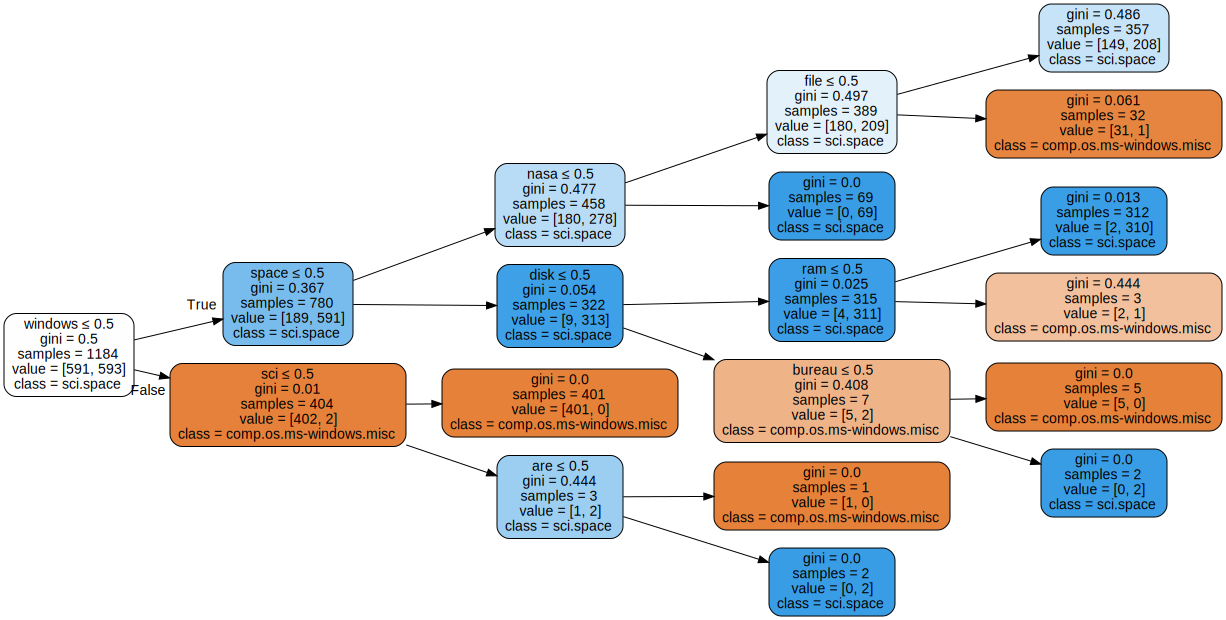

In [126]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names, class_names=target_names,
                                max_depth=None, 
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph

In [127]:
from sklearn.feature_selection import mutual_info_classif

In [128]:
mis = mutual_info_classif(X, y, discrete_features=True)

In [129]:
for i in np.argsort(mis)[::-1][:10]:
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

windows:	0.3177
space:	0.1570
nasa:	0.1284
orbit:	0.0848
earth:	0.0789
dos:	0.0773
moon:	0.0724
file:	0.0717
ms:	0.0616
launch:	0.0530


In [130]:
fis = clf.feature_importances_

In [131]:
for i in np.argsort(fis)[::-1][:10]:
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

windows:	0.3177
space:	0.1570
nasa:	0.1284
file:	0.0717
disk:	0.0223
bureau:	0.0020
sci:	0.0500
ram:	0.0201
are:	0.0039
europe:	0.0059
